# Data Preparation

In [ ]:
!pip install yfinance

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import pandas as pd
esg = pd.read_excel('/gdrive/MyDrive/금융시장의 빅데이터분석 - 텀페이퍼 /기업 대분류 완료/esg_기업 대분류 완료.xlsx')
esg.head()

,Unnamed: 0,company,code,esg,e,s,g,year,AV,ret,섹터(산업군),대분류
0,0,BNK금융지주,138930,A+,B+,A+,A+,2020,1.851312e+12,-0.000826,기타 금융업,금융 및 보험업
1,1,DGB금융지주,139130,A+,A,A+,A+,2020,1.148500e+12,0.000187,기타 금융업,금융 및 보험업
2,2,JB금융지주,175330,A+,A,A,A+,2020,1.110984e+12,0.000460,기타 금융업,금융 및 보험업
3,3,KB금융,105560,A+,A+,A+,A+,2020,1.804606e+13,0.000152,기타 금융업,금융 및 보험업
4,4,S-Oil,10950,A+,A,A+,A+,2020,7.790729e+12,-0.000677,석유 정제품 제조업,제조업


In [ ]:
esg.pop('Unnamed: 0')
esg.pop('year')
esg.columns = ['company', 'code', 'esg', 'e', 's', 'g', 'AV', 'ret', 'sector', 'sector_class']
esg.head()

,company,code,esg,e,s,g,AV,ret,sector,sector_class
0,BNK금융지주,138930,A+,B+,A+,A+,1.851312e+12,-0.000826,기타 금융업,금융 및 보험업
1,DGB금융지주,139130,A+,A,A+,A+,1.148500e+12,0.000187,기타 금융업,금융 및 보험업
2,JB금융지주,175330,A+,A,A,A+,1.110984e+12,0.000460,기타 금융업,금융 및 보험업
3,KB금융,105560,A+,A+,A+,A+,1.804606e+13,0.000152,기타 금융업,금융 및 보험업
4,S-Oil,10950,A+,A,A+,A+,7.790729e+12,-0.000677,석유 정제품 제조업,제조업


##### 'AV' Logarithm

In [ ]:
import numpy as np
esg['AV_log'] = esg['AV'].apply(np.log) #시가총액 로그화
esg.head()

,company,code,esg,e,s,g,AV,ret,sector,sector_class,AV_log
0,BNK금융지주,138930,A+,B+,A+,A+,1.851312e+12,-0.000826,기타 금융업,금융 및 보험업,28.246916
1,DGB금융지주,139130,A+,A,A+,A+,1.148500e+12,0.000187,기타 금융업,금융 및 보험업,27.769478
2,JB금융지주,175330,A+,A,A,A+,1.110984e+12,0.000460,기타 금융업,금융 및 보험업,27.736267
3,KB금융,105560,A+,A+,A+,A+,1.804606e+13,0.000152,기타 금융업,금융 및 보험업,30.523949
4,S-Oil,10950,A+,A,A+,A+,7.790729e+12,-0.000677,석유 정제품 제조업,제조업,29.683956


##### Grade Quantification
* e, s, g, esg 컬럼에 대해 진행
* 우선 1 ~ 6 부여 --> 분석 시 다시 고려 예정

In [ ]:
esg_revise = esg.copy()

In [ ]:
grade_mapper = {'A+' : 6, 'A' : 5, 'B+' : 4, 'B' : 3, 'C' : 2, 'D' : 1}

esg_revise['e'] = esg_revise['e'].map(grade_mapper)
esg_revise['s'] = esg_revise['s'].map(grade_mapper)
esg_revise['g'] = esg_revise['g'].map(grade_mapper)
esg_revise['esg'] = esg_revise['esg'].map(grade_mapper)
esg_revise.head()

,company,code,esg,e,s,g,AV,ret,sector,sector_class,AV_log
0,BNK금융지주,138930,6,4,6,6,1.851312e+12,-0.000826,기타 금융업,금융 및 보험업,28.246916
1,DGB금융지주,139130,6,5,6,6,1.148500e+12,0.000187,기타 금융업,금융 및 보험업,27.769478
2,JB금융지주,175330,6,5,5,6,1.110984e+12,0.000460,기타 금융업,금융 및 보험업,27.736267
3,KB금융,105560,6,6,6,6,1.804606e+13,0.000152,기타 금융업,금융 및 보험업,30.523949
4,S-Oil,10950,6,5,6,6,7.790729e+12,-0.000677,석유 정제품 제조업,제조업,29.683956


##### 'ret' subintervals

In [ ]:
esg_revise['ret_group'] = pd.qcut(esg_revise['ret'], 5, 
                                  labels = ['1', '2', '3', '4', '5'])
esg_revise.head()

,company,code,esg,e,s,g,AV,ret,sector,sector_class,AV_log,ret_group
0,BNK금융지주,138930,6,4,6,6,1.851312e+12,-0.000826,기타 금융업,금융 및 보험업,28.246916,1
1,DGB금융지주,139130,6,5,6,6,1.148500e+12,0.000187,기타 금융업,금융 및 보험업,27.769478,2
2,JB금융지주,175330,6,5,5,6,1.110984e+12,0.000460,기타 금융업,금융 및 보험업,27.736267,2
3,KB금융,105560,6,6,6,6,1.804606e+13,0.000152,기타 금융업,금융 및 보험업,30.523949,2
4,S-Oil,10950,6,5,6,6,7.790729e+12,-0.000677,석유 정제품 제조업,제조업,29.683956,1


##### Sector Mapping
* 추후 각 Sector의 Sampling과 데이터 제거에 따라 수정될 예정
* 현재 Sector 개수: 13개

In [ ]:
sectors = np.unique(esg_revise.sector_class)
sector_mapper = {}
for i in range(len(sectors)):
    sector_mapper[sectors[i]] = i
esg_revise['sector_num'] = esg_revise['sector_class'].map(sector_mapper)
esg_revise

,company,code,esg,e,s,g,AV,ret,sector,sector_class,AV_log,ret_group,sector_num
0,BNK금융지주,138930,6,4,6,6,1.851312e+12,-0.000826,기타 금융업,금융 및 보험업,28.246916,1,2
1,DGB금융지주,139130,6,5,6,6,1.148500e+12,0.000187,기타 금융업,금융 및 보험업,27.769478,2,2
2,JB금융지주,175330,6,5,5,6,1.110984e+12,0.000460,기타 금융업,금융 및 보험업,27.736267,2,2
3,KB금융,105560,6,6,6,6,1.804606e+13,0.000152,기타 금융업,금융 및 보험업,30.523949,2,2
4,S-Oil,10950,6,5,6,6,7.790729e+12,-0.000677,석유 정제품 제조업,제조업,29.683956,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,화인베스틸,133820,3,3,2,3,8.141025e+10,0.001232,1차 철강 제조업,제조업,25.122767,4,13
570,환인제약,16580,3,1,4,4,3.106212e+11,0.000549,의약품 제조업,제조업,26.461840,3,13
571,휴온스,243070,3,1,4,3,6.106300e+11,0.001476,의약품 제조업,제조업,27.137757,4,13
572,휴온스글로벌,84110,3,1,4,3,3.353257e+11,-0.000060,의약품 제조업,제조업,26.538368,2,13


In [ ]:
esg_revise.to_excel('/gdrive/MyDrive/금융시장의 빅데이터분석 - 텀페이퍼 /esg_final_data.xlsx')

##### Drop na's

In [ ]:
esg_revise = esg_revise.dropna()
len(esg_revise)

572

# Statistics

### 시가총액 기초통계량(로그화된 AV)

In [ ]:
#시가총액 기초통계량
esg.AV_log.describe()

count    572.000000
mean      27.071791
std        1.564104
min       23.962985
25%       25.928549
50%       26.829813
75%       28.012719
max       33.812181
Name: AV_log, dtype: float64

### ret 기초통계량

In [ ]:
# ret 기초통계량
esg.ret.describe()

count    574.000000
mean       0.001233
std        0.001782
min       -0.002681
25%        0.000029
50%        0.000838
75%        0.002070
max        0.015405
Name: ret, dtype: float64

### Sector 기초통계량

##### ret 중심

In [ ]:
# sector_class 별 ret 값
sector_group = esg_revise.groupby('sector_class')[['ret']].agg(['count', 'mean', 'std', 'max', 'min'])
sector_group = sector_group['ret'].sort_values(by = 'mean', ascending = False)
sector_group

,count,mean,std,max,min
sector_class,,,,,
부동산업,1,0.002189,NaN,0.002189,0.002189
제조업,312,0.001513,0.001923,0.015405,-0.002681
건설업,18,0.001505,0.001336,0.003902,-0.000873
운수 및 창고업,20,0.001404,0.001651,0.006058,-0.000853
정보통신업,48,0.001300,0.001714,0.006763,-0.001437
"전문, 과학 및 기술 서비스업",23,0.001176,0.001856,0.004635,-0.001776
도매 및 소매업,41,0.000810,0.001677,0.006902,-0.001006
"사업시설 관리, 사업 지원 및 임대 서비스업",6,0.000578,0.000899,0.001841,-0.000577
금융 및 보험업,83,0.000565,0.001285,0.007018,-0.001258


##### e 중심

In [ ]:
e_group = esg_revise.groupby('sector_class')[['e']].agg(['count', 'mean', 'std', 'max', 'min'])
e_group = e_group['e'].sort_values(by = 'mean', ascending = False)
e_group

,count,mean,std,max,min
sector_class,,,,,
"협회 및 단체, 수리 및 기타 개인 서비스업",1,5.000000,NaN,5,5
건설업,18,3.222222,1.308594,6,1
제조업,312,3.144231,1.123427,6,1
운수 및 창고업,20,3.100000,1.119210,5,2
"전기, 가스, 증기 및 공기 조절 공급업",10,2.900000,1.100505,4,1
도매 및 소매업,41,2.682927,1.619244,6,1
금융 및 보험업,83,2.554217,1.450425,6,1
숙박 및 음식점업,2,2.500000,0.707107,3,2
"전문, 과학 및 기술 서비스업",23,2.217391,1.412815,6,1


##### s 중심

In [ ]:
s_group = esg_revise.groupby('sector_class')[['s']].agg(['count', 'mean', 'std', 'max', 'min'])
s_group = s_group['s'].sort_values(by = 'mean', ascending = False)
s_group

,count,mean,std,max,min
sector_class,,,,,
"협회 및 단체, 수리 및 기타 개인 서비스업",1,6.000000,NaN,6,6
"예술, 스포츠 및 여가관련 서비스업",3,4.666667,0.577350,5,4
"전기, 가스, 증기 및 공기 조절 공급업",10,4.400000,1.264911,6,2
도매 및 소매업,41,4.317073,1.213240,6,2
금융 및 보험업,83,4.301205,0.996762,6,2
"전문, 과학 및 기술 서비스업",23,3.869565,1.099766,6,2
정보통신업,48,3.791667,0.874176,6,3
제조업,312,3.766026,1.175746,6,2
운수 및 창고업,20,3.750000,1.118034,6,2


##### g 중심

In [ ]:
g_group = esg_revise.groupby('sector_class')[['g']].agg(['count', 'mean', 'std', 'max', 'min'])
g_group = g_group['g'].sort_values(by = 'mean', ascending = False)
g_group

,count,mean,std,max,min
sector_class,,,,,
"예술, 스포츠 및 여가관련 서비스업",3,4.666667,0.577350,5,4
도매 및 소매업,41,4.195122,0.843194,6,3
운수 및 창고업,20,4.050000,0.887041,5,2
"농업, 임업 및 어업",1,4.000000,NaN,4,4
부동산업,1,4.000000,NaN,4,4
"협회 및 단체, 수리 및 기타 개인 서비스업",1,4.000000,NaN,4,4
금융 및 보험업,83,3.987952,0.930434,6,3
"전기, 가스, 증기 및 공기 조절 공급업",10,3.900000,0.567646,5,3
정보통신업,48,3.895833,0.880995,6,3


##### 제조업 (300 + 개 Data 세부사항)
* 다른 Sector에 비해 압도적으로 Data 개수가 많으므로 추후 Sampling 예정

In [ ]:
manufacturing = esg_revise[esg_revise['sector_class'] == '제조업']
np.unique(manufacturing['sector'])

array(['1차 비철금속 제조업', '1차 철강 제조업', '가구 제조업', '가정용 기기 제조업',
       '가죽, 가방 및 유사제품 제조업', '고무제품 제조업', '곡물가공품, 전분 및 전분제품 제조업',
       '골판지, 종이 상자 및 종이용기 제조업', '구조용 금속제품, 탱크 및 증기발생기 제조업', '금속 주조업',
       '기초 의약물질 및 생물학적 제제 제조업', '기초 화학물질 제조업', '기타 금속 가공제품 제조업',
       '기타 비금속 광물제품 제조업', '기타 식품 제조업', '기타 전기장비 제조업', '기타 종이 및 판지 제품 제조업',
       '기타 화학제품 제조업', '나무제품 제조업', '낙농제품 및 식용빙과류 제조업', '내화, 비내화 요업제품 제조업',
       '담배 제조업', '도축, 육류 가공 및 저장 처리업', '동물용 사료 및 조제식품 제조업',
       '무기 및 총포탄 제조업', '반도체 제조업', '방적 및 가공사 제조업', '봉제의복 제조업',
       '비료, 농약 및 살균, 살충제 제조업', '비알코올음료 및 얼음 제조업', '석유 정제품 제조업',
       '선박 및 보트 건조업', '시멘트, 석회, 플라스터 및 그 제품 제조업', '신발 및 신발 부분품 제조업',
       '알코올음료 제조업', '영상 및 음향기기 제조업', '의약품 제조업', '일반 목적용 기계 제조업',
       '일차전지 및 축전지 제조업', '자동차 신품 부품 제조업', '자동차용 엔진 및 자동차 제조업',
       '전구 및 조명장치 제조업', '전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업', '전자부품 제조업',
       '절연선 및 케이블 제조업', '제재 및 목재 가공업', '직물직조 및 직물제품 제조업', '철도장비 제조업',
       '측정, 시험, 항해, 제어 및 기타 정밀기기 제조업; 광학기기 제외', '컴퓨터 및 주변장치 제조업',
 

* 세부 카테고리 별 개수 확인

In [ ]:
mn_group = manufacturing.groupby('sector').agg(['count', 'mean', 'std', 'max', 'min'])[['ret']]['ret']
mn_group.sort_values(by = 'count', ascending = False)

,count,mean,std,max,min
sector,,,,,
의약품 제조업,29,0.002768,0.003186,0.015405,-0.000860
자동차 신품 부품 제조업,22,0.000937,0.001004,0.002878,-0.000361
기타 화학제품 제조업,20,0.001585,0.001804,0.005202,-0.001283
1차 철강 제조업,19,0.000851,0.001241,0.002954,-0.002143
기초 화학물질 제조업,17,0.001992,0.001553,0.004841,0.000174
특수 목적용 기계 제조업,17,0.001218,0.001048,0.003080,-0.000803
기타 식품 제조업,16,0.000999,0.001237,0.003752,-0.001325
일반 목적용 기계 제조업,15,0.001626,0.002459,0.007460,-0.002029
전자부품 제조업,11,0.001625,0.001201,0.003827,-0.000136


##### 그 외: Sector 개수가 3개 미만인 경우, 검토 후 삭제 예정

# Data Exploration

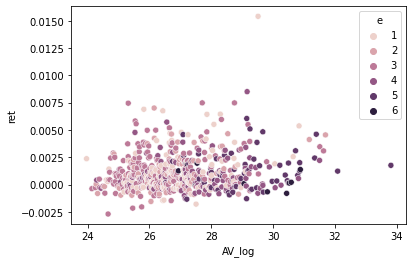

In [ ]:
x = 'AV_log'
y = 'ret'
hue = 'e'

scatter_df = esg_revise.groupby([x, hue]).agg({y : np.mean}).reset_index()
sns.scatterplot(data = scatter_df, x = x, y = y, hue = hue)

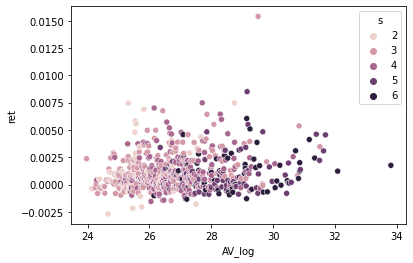

In [ ]:
x = 'AV_log'
y = 'ret'
hue = 's'

scatter_df = esg_revise.groupby([x, hue]).agg({y : np.mean}).reset_index()
sns.scatterplot(data = scatter_df, x = x, y = y, hue = hue)

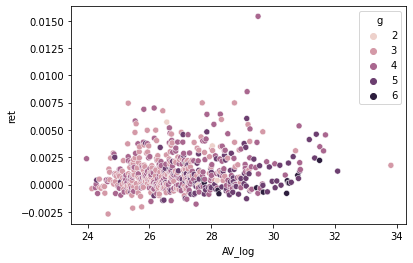

In [ ]:
x = 'AV_log'
y = 'ret'
hue = 'g'

scatter_df = esg_revise.groupby([x, hue]).agg({y : np.mean}).reset_index()
sns.scatterplot(data = scatter_df, x = x, y = y, hue = hue)

* e, s, g를 기준으로 그린 그래프 3개 모두 비슷한 경향성을 보임
    - 시가총액이 높은 기업들이 주로 e, s, g 등급이 높음
    - e, s, g 가 높을수록 꼭 ret 값이 높지는 않음
    - 다만, 시가총액이 top 10 안에 드는 기업들은 ret 값과 e, s, g 등급이 높음 (세 개의 그래프에서 모두 오른쪽 끝은 살짝 올라간 형태)

* ret 값이 높은 한 개의 outlier는?

In [ ]:
esg_revise[esg_revise['ret'] == esg_revise['ret'].max()]

,company,code,esg,e,s,g,AV,ret,sector,sector_class,AV_log,ret_group,sector_num
410,신풍제약,19170,3,1,3,4,6.570139e+12,0.015405,의약품 제조업,제조업,29.513556,5,13


* 시가총액이 maximum인 outlier는?

In [ ]:
esg_revise[esg_revise['AV_log'] == esg_revise['AV_log'].max()]

,company,code,esg,e,s,g,AV,ret,sector,sector_class,AV_log,ret_group,sector_num
168,삼성전자,5930,4,5,6,3,4.835524e+14,0.001772,통신 및 방송 장비 제조업,제조업,33.812181,4,13


* --> outlier 검토 후 삭제 여부 결정

In [ ]:
# 한글깨짐 해결을 위한 패키지 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
#한글폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


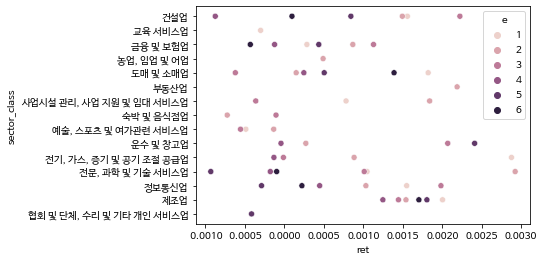

In [ ]:
x = 'ret'
y = 'sector_class'
hue = 'e'

scatter_df = esg_revise.groupby([y, hue]).agg({x : np.mean}).reset_index()
sns.scatterplot(data = scatter_df, x = x, y = y, hue = hue)

* 금융 및 보험업 --> ret 값 낮은 편, e값 대체로 높음
* 제조업 --> ret 값 모두 높은 편, e값 대체로 높음
* 나머지는 대체로 퍼져있음
* 정보통신업, 건설업 --> ret 값이 상대적으로 낮은 기업들이 오히려 높은 e값을 가지고 있음